In [152]:

# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings

df= pd.read_csv('/Users/gauravthakur/Desktop/Uber Project_pandas/data/uber-raw-data-aug14.csv')
df.head()


,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [ ]:
# Q1. On what date did we see the most number of Uber pickups?
# Skill Test: Grouping & Counting

# Convert the 'Date/Time' column to datetime format


# Group by date and count the number of pickups


# Find the date with the highest number of pickups


In [153]:
#splitiing date & time using str.split in ths 2nd argument for taking only 1 value..


date_ext= pd.to_datetime(df['Date/Time'])
# Extract only the date part from the datetime column ...

only_date = date_ext.dt.date

# Extract only the date part from the datetime column with specific format

# df['date_only'] = df['Date/Time'].dt.strftime('%m/%d/%Y')

#below code if Date time in Object data type like string above one  when we convert to Datetime
# df['date_only'] = df['Date/Time'].str.split(' ').str[0]

#using value_counts to calculate the date wise pickups..

only_date.value_counts().sort_values(ascending=False).head(10)
# print(df['date_only'])

2014-08-07    32759
2014-08-01    32353
2014-08-21    32304
2014-08-06    30495
2014-08-14    30457
2014-08-08    30411
2014-08-13    29788
2014-08-12    29646
2014-08-22    29512
2014-08-15    28974
Name: Date/Time, dtype: int64

In [154]:
highest_pickup_date= only_date.value_counts().sort_values(ascending=False).index[0]
print('Highest Pickups Happened on ',highest_pickup_date)

Highest Pickups Happened on  2014-08-07


In [86]:
# Q.2 How many Uber pickups were made on the date with the highest number of pickups?
# Skill Test: Indexing and filtering

# [ ]
# # Get the count of pickups on the highest date

In [155]:
highest_pickup_count= only_date.value_counts().sort_values(ascending=False).iloc[0]
print('Highest Pickups Count is : ',highest_pickup_count)

Highest Pickups Count is :  32759


In [ ]:
# Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?
# Skill Test: Counting unique values

# [ ]
# # Count the number of unique TLC base companies

In [156]:
unique_tlc_Base= df['Base'].nunique()
print('Number of unique TLC base companies  are :',unique_tls)

Number of unique TLC base companies  are : 5


In [ ]:
# Q.4 Which TLC base company had the highest number of pickups?
# Skill Test: Grouping, counting, and finding the maximum

# [ ]
# # Find the TLC base company with the highest number of pickups

In [157]:
tlc_with_high_pickups= df['Base'].value_counts().sort_values(ascending=False).index[0]
tlc_with_high_pickups_order_count= df['Base'].sort_values(ascending=False).iloc[0]
print('TLC base company with the highest number of pickups is',tlc_with_high_pickups)

TLC base company with the highest number of pickups is B02617


In [ ]:
# Q.5 How many Uber pickups were made at each unique TLC base company?
# Skill Test: Grouping and counting

# [ ]
# # Group by TLC base company and count the number of pickups

In [158]:
tlc_group= df.groupby(df['Base']).size().sort_values(ascending=False)
print('Group by TLC base company and count the number of pickups',tlc_group)

Group by TLC base company and count the number of pickups Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
dtype: int64


In [ ]:
# Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?
# Skill Test: Extracting time components, grouping, counting, and finding the maximum

# Extract the hour from the 'Date/Time' column


# Group by hour and count the number of pickups


# Find the hour with the highest number of pickups


In [281]:
#extrcating time from date/time colum--
  #group by hour ......
busy_hour= date_ext.dt.hour.sort_values(ascending=False)
# print(busy_hour)

#count of  pikcups.... idmax for  return the index of highes value...
bussiest_time=busy_hour.value_counts().idxmax()
# converting to print isn time format-- using. stfrtime...
print('the busiest time of day for Uber pickups is  :',bussiest_time,"IST ")



the busiest time of day for Uber pickups is  : 17 IST 


In [59]:
# Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups
# over time?
# Skill Test: Data Visualization using Plotting function




# Create a line plot to visualize the number of pickups over time

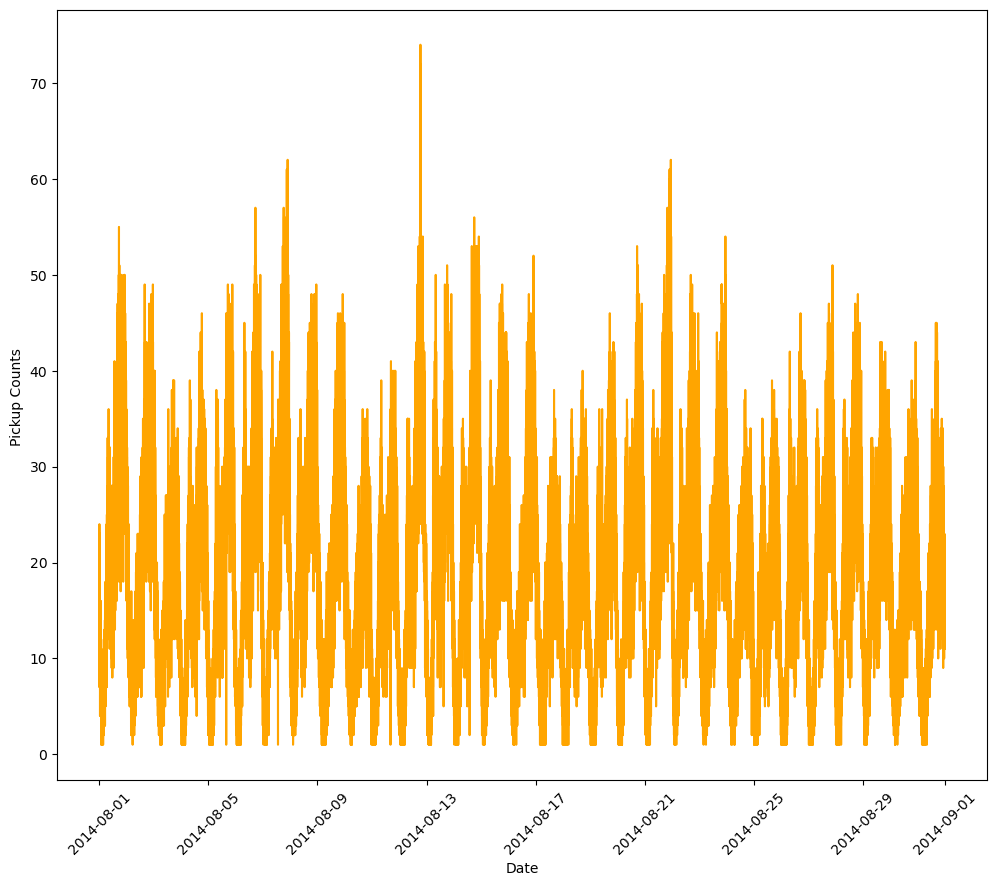

In [322]:
date_grp= only_date.groupby(date_ext).size()    #groupby date..
# print(date_grp)

plt.figure(figsize=(12,10))

sns.lineplot(x=date_grp.index,y=date_grp.values,data=date_grp, color='Orange')
plt.ylabel('Pickup Counts ')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?
# Skill Test: Scatter Plot

# [ ]
# # Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude

<Axes: xlabel='Lat', ylabel='Lon'>

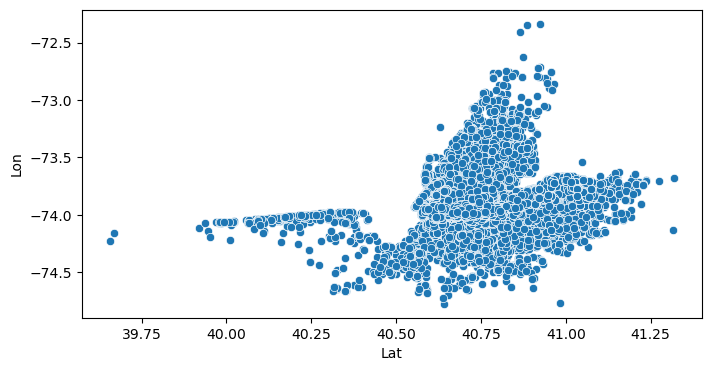

In [186]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Lat'],y=df['Lon'])

In [ ]:
# Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?
# Skill Test: Bar Chart

# [ ]
# # Create a bar chart to compare the number of Uber pickups for each TLC base company

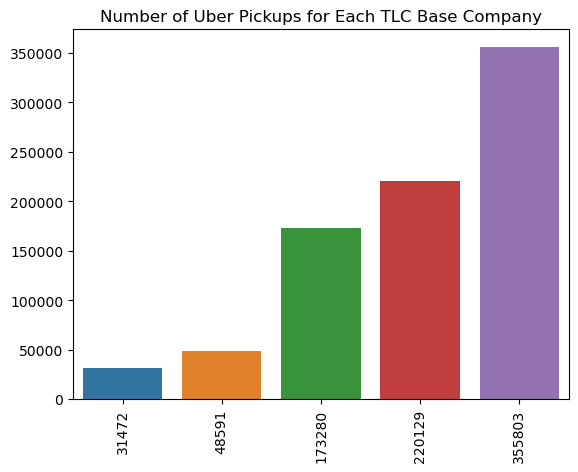

In [327]:
tlc_group.sort_values(ascending=False,inplace=True)

plt.figure()
sns.barplot(x=tlc_group.index,y=tlc_group.values,data=tlc_group)
#===customisation=======
xlabel='TLC_Company_Name'
ylabel='pickup_count'
plt.title('Number of Uber Pickups for Each TLC Base Company')
plt.xticks(rotation=90)  # to rotate x-axis labels for better readability
plt.show()

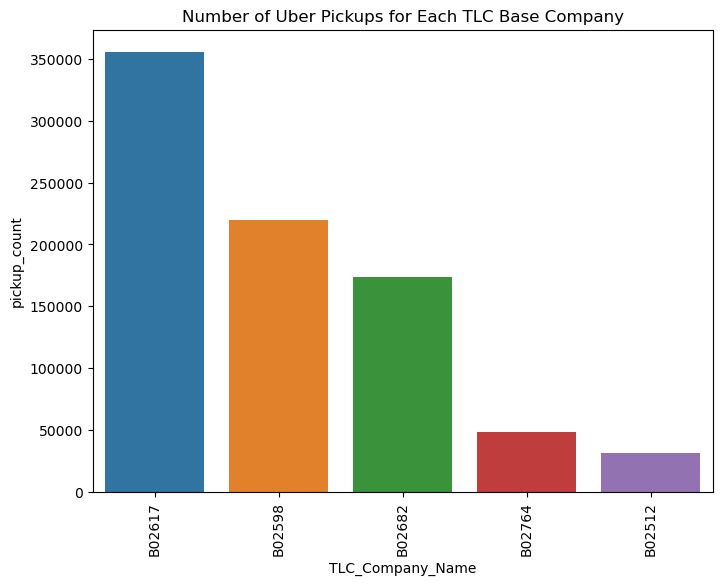

In [249]:

tlc_cmny_counts= df['Base'].value_counts().sort_values(ascending= False).reset_index()
tlc_cmny_counts.columns= ['TLC_Company_Name', 'pickup_count']
# print(tlc_cmny_counts)
plt.figure(figsize=(8,6))
 #bar chart====
bar_chart_uber= sns.barplot(x='TLC_Company_Name',y='pickup_count',data=tlc_cmny_counts)
#===customisation=======
xlabel='TLC_Company_Name'
ylabel='pickup_count'
plt.title('Number of Uber Pickups for Each TLC Base Company')
plt.xticks(rotation=90)  # to rotate x-axis labels for better readability

plt.show()

In [ ]:
# Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?
# Skill Test: Pie Chart

# Group by day of the week and count the number of pickups
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week

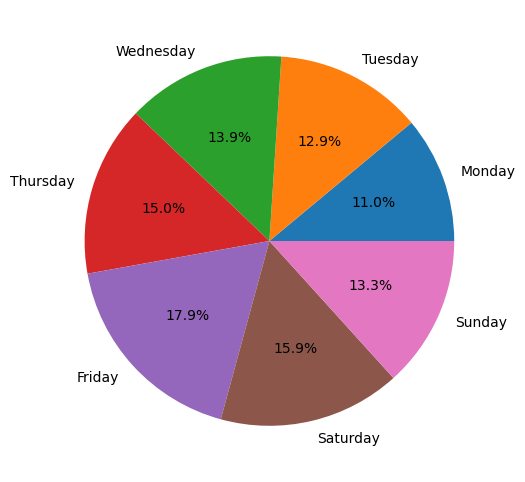

In [355]:
wk_days= date_ext.dt.dayofweek
final_days= wk_days.value_counts().sort_index()
x= {
    0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',
    4:'Friday',5:'Saturday',6:'Sunday',
   
    
}

final_days.index=final_days.index.map(x)



# print(final_days)


plt.figure(figsize=(10,6))
plt.pie( x=final_days.values,labels=final_days.index,autopct='%1.1f%%' )
plt.show()